# Excavator use-case 1: problem statement and first solution

In [1]:
from IPython.display import Image
%matplotlib widget
import processscheduler as ps

### Problem: dig 3 holes (small, medium, big) using 2 excavators (one small size, one medimum size)

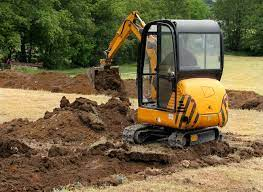

In [2]:
Image('excavator_small.jpeg', width=200)

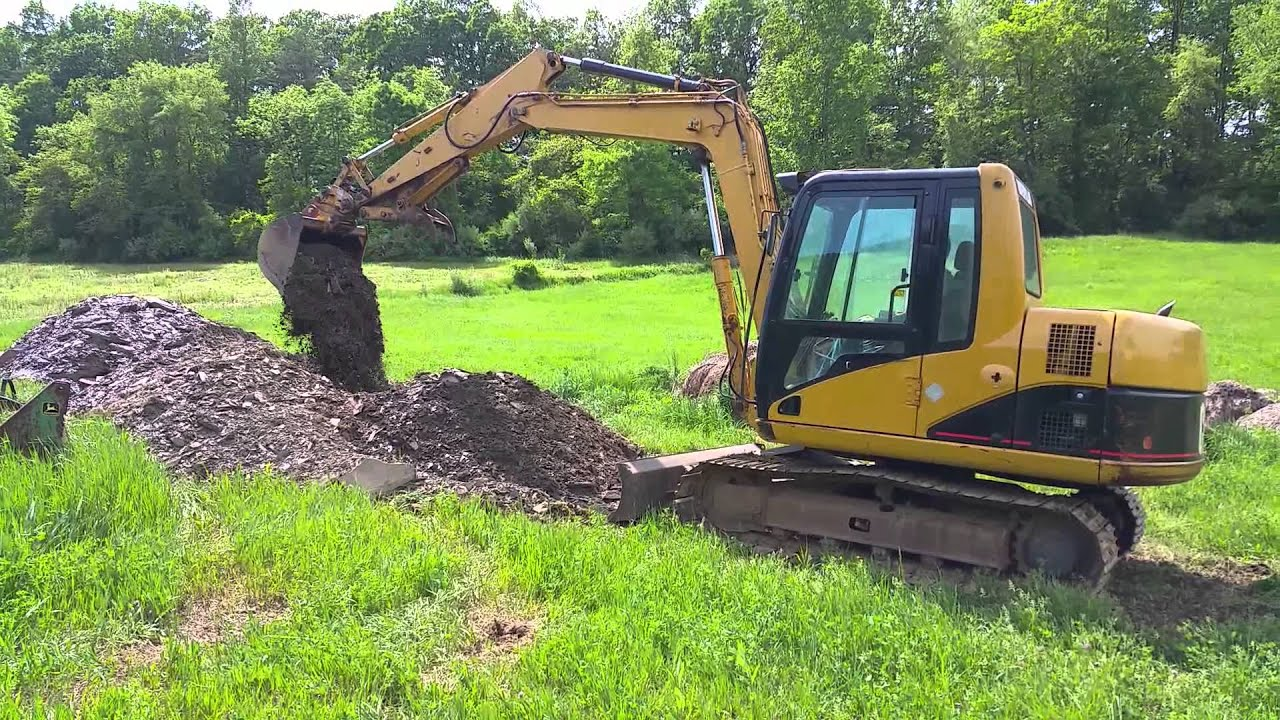

In [3]:
Image('excavator_medium_size.jpg', width=300)

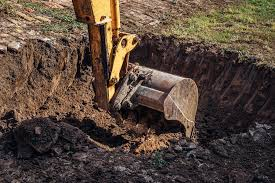

In [4]:
Image('small_hole.jpeg', width=200)

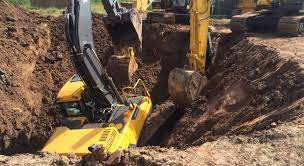

In [5]:
Image('medium_hole.jpeg', width=300)

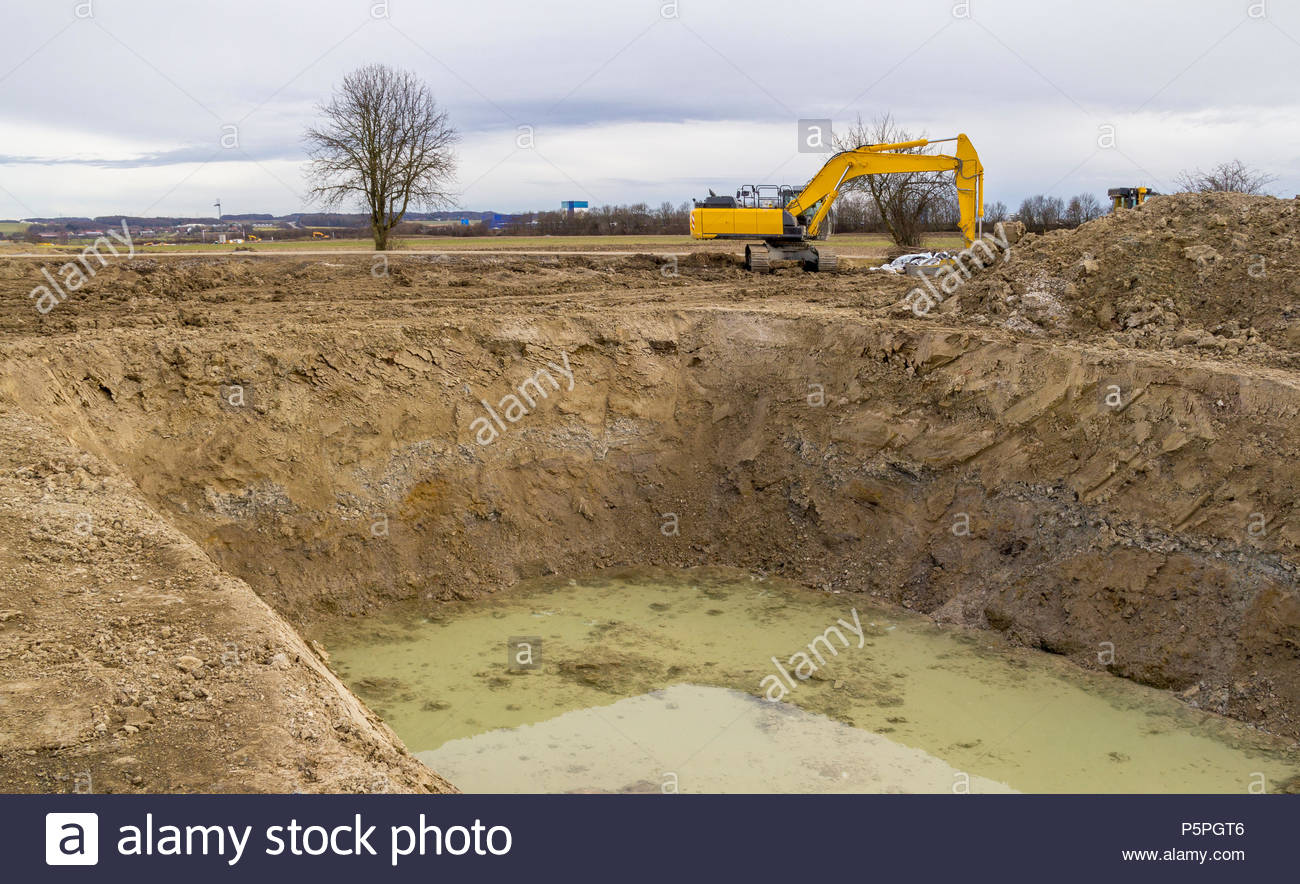

In [6]:
Image('huge_hole.jpg', width=400)

In [7]:
problem = ps.SchedulingProblem('Excavator1:ProblemDefinition')

# three tasks
dig_small_hole = ps.FixedDurationTask('DigSmallHole', duration=3)
dig_medium_hole = ps.FixedDurationTask('DigMediumHole', duration=7)
dig_huge_hole = ps.FixedDurationTask('DigHugeHole', duration=15)

# two workers
small_exc = ps.Worker('SmallExcavator')
medium_ex = ps.Worker('MediumExcavator')

dig_small_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))
dig_medium_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))
dig_huge_hole.add_required_resource(ps.SelectWorkers([small_exc, medium_ex], 1, kind='min'))

solver = ps.SchedulingSolver(problem)
solution = solver.solve()

Solver type:
	-> Standard SAT/SMT solver
Total computation time:
	Excavator1:ProblemDefinition satisfiability checked in 0.01s


In [8]:
print(solution)

{
    "buffers": {},
    "horizon": 25,
    "indicators": {},
    "problem_properties": {
        "problem_end_time": null,
        "problem_start_time": null,
        "problem_timedelta": null
    },
    "resources": {
        "MediumExcavator": {
            "assignments": [
                [
                    "DigSmallHole",
                    22,
                    25
                ],
                [
                    "DigMediumHole",
                    15,
                    22
                ]
            ],
            "name": "MediumExcavator",
            "type": "Worker"
        },
        "SmallExcavator": {
            "assignments": [
                [
                    "DigMediumHole",
                    15,
                    22
                ],
                [
                    "DigHugeHole",
                    0,
                    15
                ]
            ],
            "name": "SmallExcavator",
            "type": "Worker"
        }
 

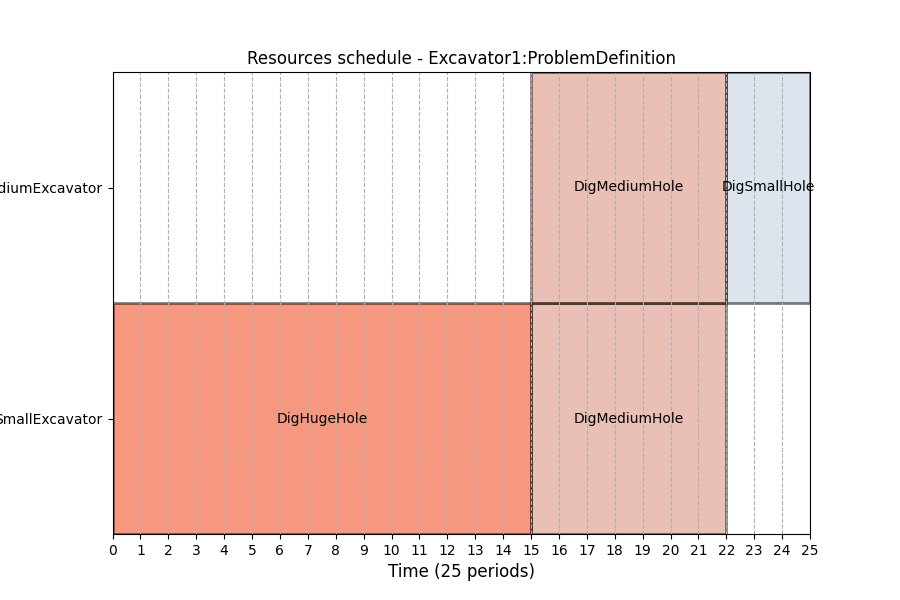

In [9]:
solution.render_gantt_matplotlib()